In [2]:
# Re-run this cell to install and import the necessary libraries and load the required variables
# ! pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

In [3]:

# Start coding here
# Initialize Q-table (500 states x 6 actions)
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Q-learning hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 1.0    # Initial exploration rate
epsilon_decay = 0.999   # Decay factor for exploration
epsilon_min = 0.1       # Minimum exploration rate

# Store episode rewards
episode_returns = []

# Train the agent for 2,000 episodes
for episode in range(2000):
    state, _ = env.reset()  # Reset environment
    total_reward = 0
    
    for _ in range(max_actions):
        # Choose action using ε-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Execute action
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        # Update Q-value using Bellman equation
        q_table[state, action] = (1 - alpha) * q_table[state, action] + \
                                 alpha * (reward + gamma * np.max(q_table[next_state]))

        # Move to next state
        state = next_state

        if done:
            break

    # Reduce exploration rate
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    # Store total reward for this episode
    episode_returns.append(total_reward)

q_table = np.array(q_table)

In [4]:
policy = {state: np.argmax(q_table[state]) for state in range(env.observation_space.n)}

In [5]:
# Set random seed
state, _ = env.reset(seed=42)
frames = []  # Store render frames
episode_total_reward = 0

for _ in range(16):
    frames.append(env.render())  # Capture frame
    action = policy[state]  # Select best action
    next_state, reward, done, _, _ = env.step(action)
    episode_total_reward += reward
    state = next_state

    if done:
        break
        

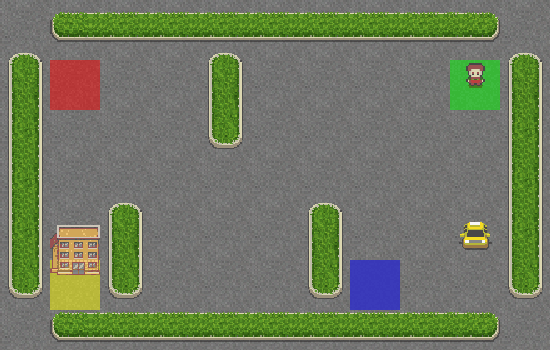

In [6]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 